# Information Theory Part 2

https://en.wikipedia.org/wiki/Information_theory  

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import math
import matplotlib.pyplot as plt

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.888069,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.880947,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.070835,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.538445,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.384163,82271200


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.412415,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.731918,77034200


In [4]:
# Extract the closing prices from the data
prices = df['Adj Close']


In [5]:
# Calculate daily returns
returns = prices.pct_change().dropna()

In [6]:
# Calculate the probability distribution of returns
probabilities, _ = np.histogram(returns, bins='auto', density=True)

In [7]:
# Apply information theory - Shannon entropy
entropy = -np.sum(probabilities * np.log2(probabilities))

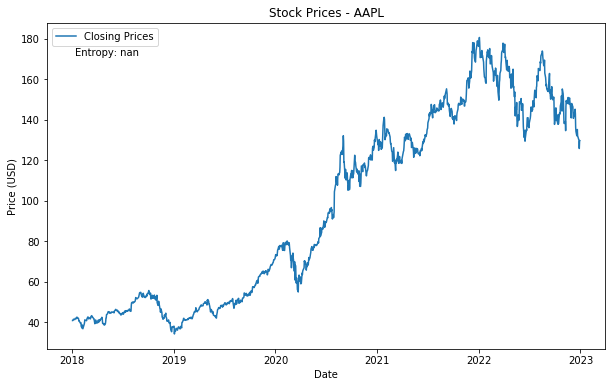

In [8]:
# Plotting the stock prices
plt.figure(figsize=(10, 6))
plt.plot(prices.index, prices, label="Closing Prices")
plt.title(f"Stock Prices - {symbol}")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()

# Show the calculated entropy value
plt.text(0.05, 0.9, f"Entropy: {entropy:.4f}", transform=plt.gca().transAxes)

# Show the plot
plt.show()

In [9]:
# Calculate the information entropy of the closing price data
probabilities = np.histogram(prices, bins=20, density=True)[0]
Entropy = -np.sum(probabilities * np.log2(probabilities))
print("Entropy of " + symbol + " closing prices:", Entropy)

Entropy of AAPL closing prices: 0.9357742974754809


In [10]:
# Calculate and apply information theory concepts
entropy = -np.sum(returns * np.log2(returns + 1e-10))  # Add small value to avoid log(0)
average = np.mean(returns)
variance = np.var(returns)

# Print the calculated information theory values
print(f'Entropy: {entropy}')
print(f'Average: {average}')
print(f'Variance: {variance}')

Entropy: 55.555898343992205
Average: 0.0011407194061788953
Variance: 0.0004445861581950274
